<a href="https://colab.research.google.com/github/Jenniferlemossilva/ProjetoFinal_On34/blob/main/Projeto_final_S34___Alunas_Gabriela%2CJennifer_Lemos%2C_Lohana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

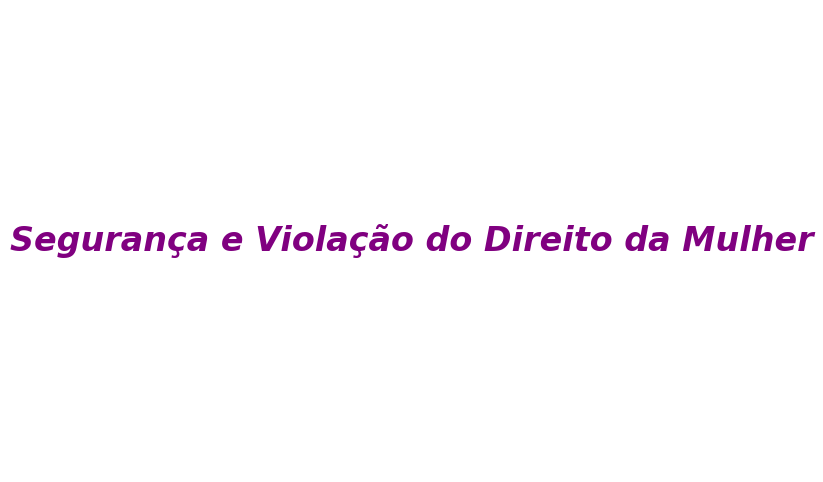

In [ ]:
import matplotlib.pyplot as plt

# Criando a figura
plt.figure(figsize=(8, 6))

# Adicionando o título estilizado
plt.text(0.5, 0.5, 'Segurança e Violação do Direito da Mulher',
         fontsize=24, fontweight='bold', color='purple',
         ha='center', va='center', fontstyle='italic')


plt.axis('off')

# Exibir
plt.show()

In [ ]:
# Importando biblioteca para análise do CSV
import pandas as pd

# Arquivo/ carregamento
file_path = 'dados_violencia_mulheres_ses_2023.csv'
df = pd.read_csv(file_path)

df.head(), df.columns


(  DT_NOTIFIC;DT_NASC;NU_IDADE_N;CS_SEXO;CS_RACA;ID_MN_RESI;LOCAL_OCOR;OUT_VEZES;LES_AUTOP;VIOL_FISIC;VIOL_PSICO;VIOL_SEXU;NUM_ENVOLV;AUTOR_SEXO;ORIENT_SEX;IDENT_GEN
 0  02/01/2023;21/03/2008;14;Feminino;Branca;Rio N...                                                                                                                
 1  01/01/2023;29/11/1976;46;Feminino;Branca;Carmo...                                                                                                                
 2  02/01/2023;10/05/1997;25;Feminino;Parda;Pirapo...                                                                                                                
 3  02/01/2023;02/10/1982;40;Feminino;Parda;Várzea...                                                                                                                
 4  03/01/2023;10/11/2016;6;Feminino;Parda;Guaraci...                                                                                                                ,
 In

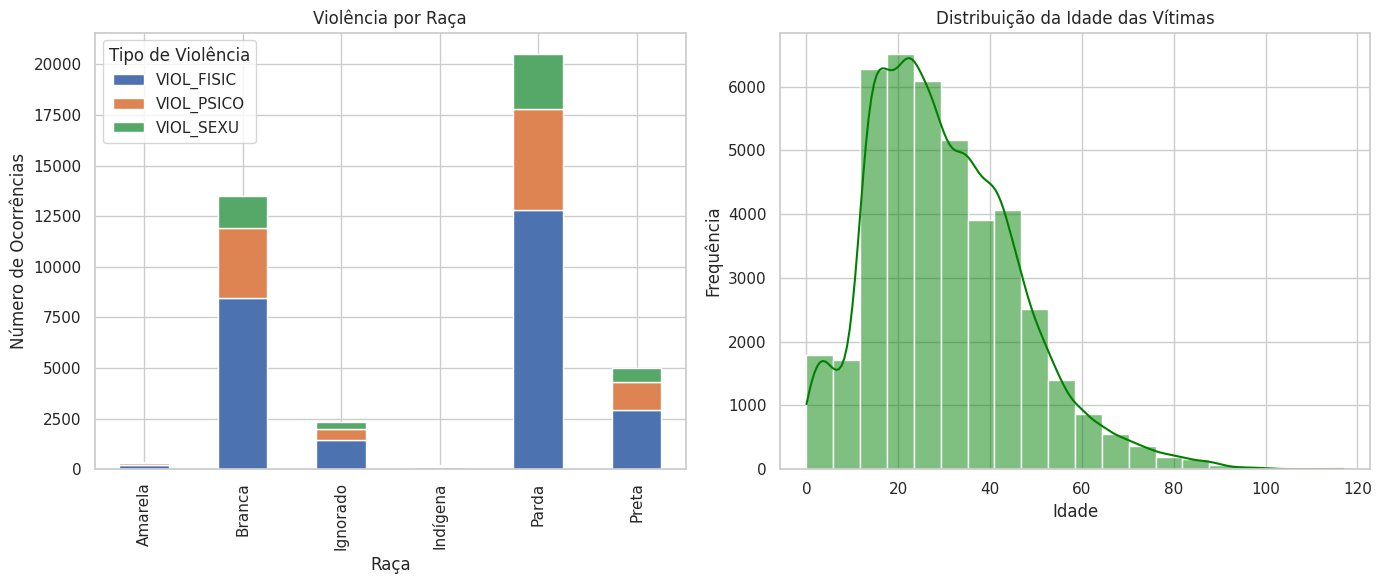

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definição do gráfico
sns.set(style="whitegrid")

# Análise  e correlação com dados violência por raça.
violence_by_race = df.groupby('CS_RACA')[['VIOL_FISIC', 'VIOL_PSICO', 'VIOL_SEXU']].apply(lambda x: (x == 'Sim').sum())

# Gráfico  violência/raça
fig, ax = plt.subplots(1, 2, figsize=(14, 6))


violence_by_race.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Violência por Raça')
ax[0].set_xlabel('Raça')
ax[0].set_ylabel('Número de Ocorrências')
ax[0].legend(title='Tipo de Violência')

# Distribuição da idade no conjunto de dados
sns.histplot(df['NU_IDADE_N'], bins=20, kde=True, ax=ax[1], color='green')
ax[1].set_title('Distribuição da Idade das Vítimas')
ax[1].set_xlabel('Idade')
ax[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


Index(['DT_NOTIFIC', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_RACA',
       'ID_MN_RESI', 'LOCAL_OCOR', 'OUT_VEZES', 'LES_AUTOP', 'VIOL_FISIC',
       'VIOL_PSICO', 'VIOL_SEXU', 'NUM_ENVOLV', 'AUTOR_SEXO', 'ORIENT_SEX',
       'IDENT_GEN'],
      dtype='object')


<ipython-input-52-57358d01e42e>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  violence_by_age_group = df.groupby('age_group')[['VIOL_FISIC', 'VIOL_PSICO', 'VIOL_SEXU']].apply(lambda x: (x == 'sim').sum())


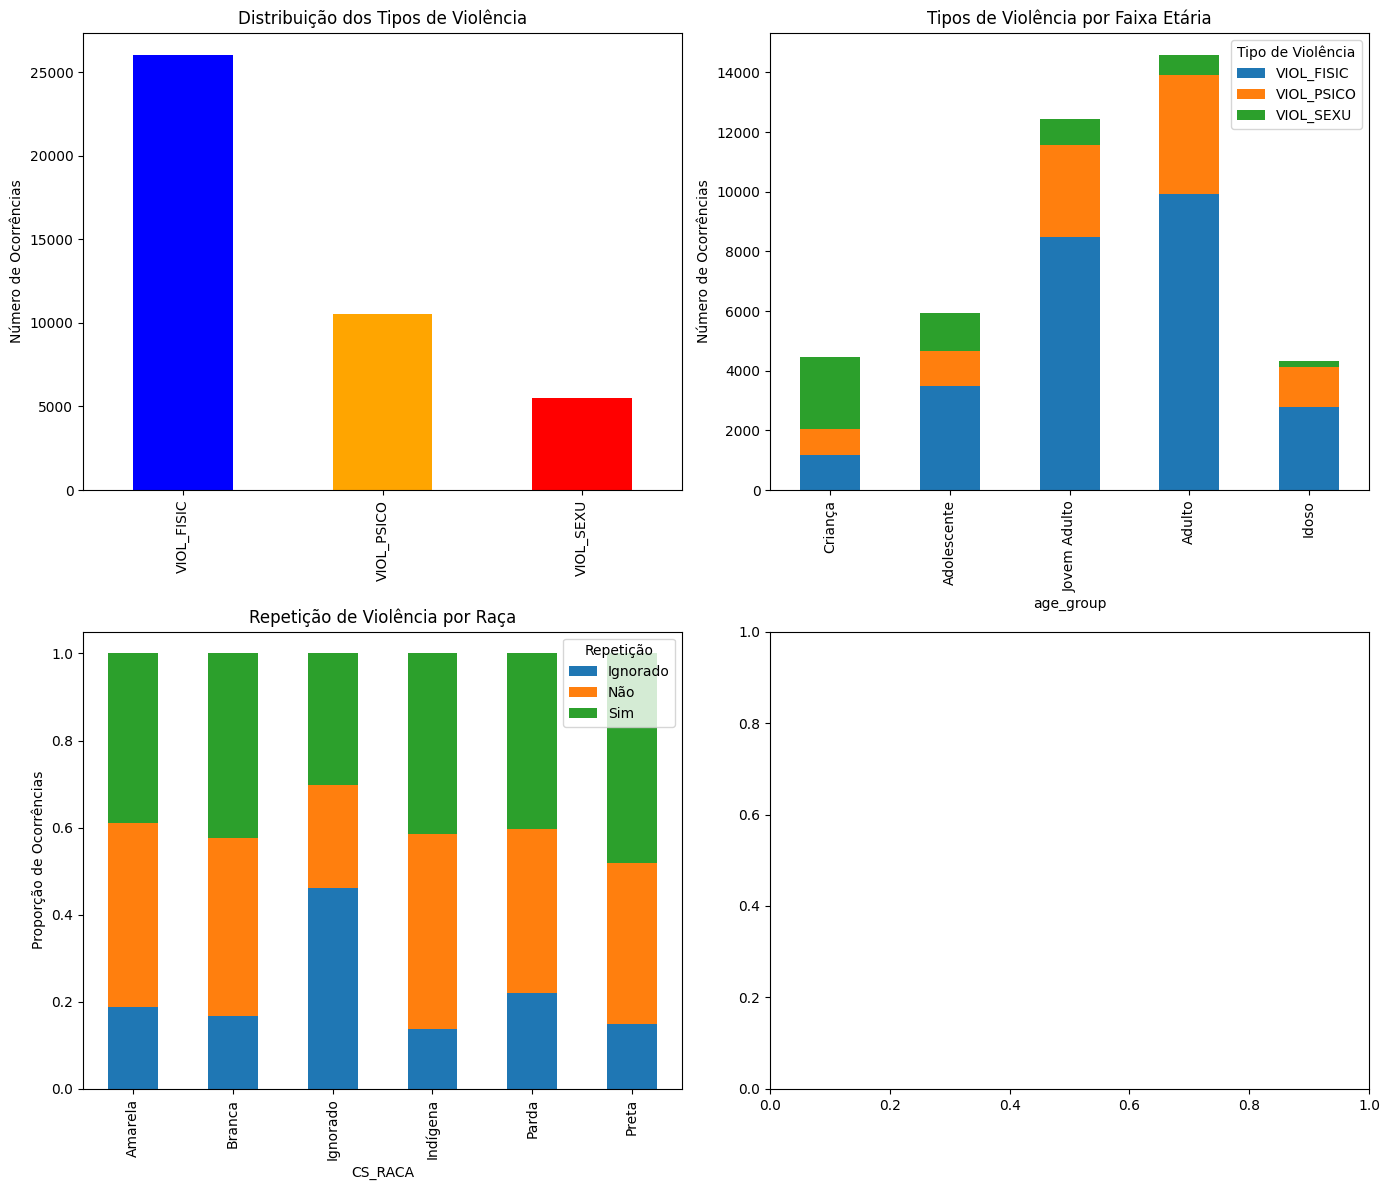

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset com o delimitador correto
df = pd.read_csv('dados_violencia_mulheres_ses_2023.csv', sep=';')

# Verificar os nomes das colunas
print(df.columns)

# 1. Distribuição dos tipos de violência
# Certificar-se de que estamos lidando com valores consistentes
df[['VIOL_FISIC', 'VIOL_PSICO', 'VIOL_SEXU']] = df[['VIOL_FISIC', 'VIOL_PSICO', 'VIOL_SEXU']].apply(lambda x: x.str.strip().str.lower().fillna('não'))

# Contando o número de ocorrências de cada tipo de violência
violence_types = df[['VIOL_FISIC', 'VIOL_PSICO', 'VIOL_SEXU']].apply(lambda x: (x == 'sim').sum())

# 2. Violência por faixa etária
df['age_group'] = pd.cut(df['NU_IDADE_N'], bins=[0, 12, 18, 30, 50, 100], labels=["Criança", "Adolescente", "Jovem Adulto", "Adulto", "Idoso"])
violence_by_age_group = df.groupby('age_group')[['VIOL_FISIC', 'VIOL_PSICO', 'VIOL_SEXU']].apply(lambda x: (x == 'sim').sum())

# 3. Repetição de violência por raça
repetition_by_race = df.groupby('CS_RACA')['OUT_VEZES'].value_counts(normalize=True).unstack().fillna(0)

# Plotando os insights
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# 1. Gráfico para distribuição dos tipos de violência
violence_types.plot(kind='bar', ax=ax[0, 0], color=['blue', 'orange', 'red'])
ax[0, 0].set_title('Distribuição dos Tipos de Violência')
ax[0, 0].set_ylabel('Número de Ocorrências')

# 2. Violência por faixa etária
violence_by_age_group.plot(kind='bar', stacked=True, ax=ax[0, 1])
ax[0, 1].set_title('Tipos de Violência por Faixa Etária')
ax[0, 1].set_ylabel('Número de Ocorrências')
ax[0, 1].legend(title='Tipo de Violência')

# 3. Repetição de violência por raça
repetition_by_race.plot(kind='bar', stacked=True, ax=ax[1, 0])
ax[1, 0].set_title('Repetição de Violência por Raça')
ax[1, 0].set_ylabel('Proporção de Ocorrências')
ax[1, 0].legend(title='Repetição')

plt.tight_layout()
plt.show()


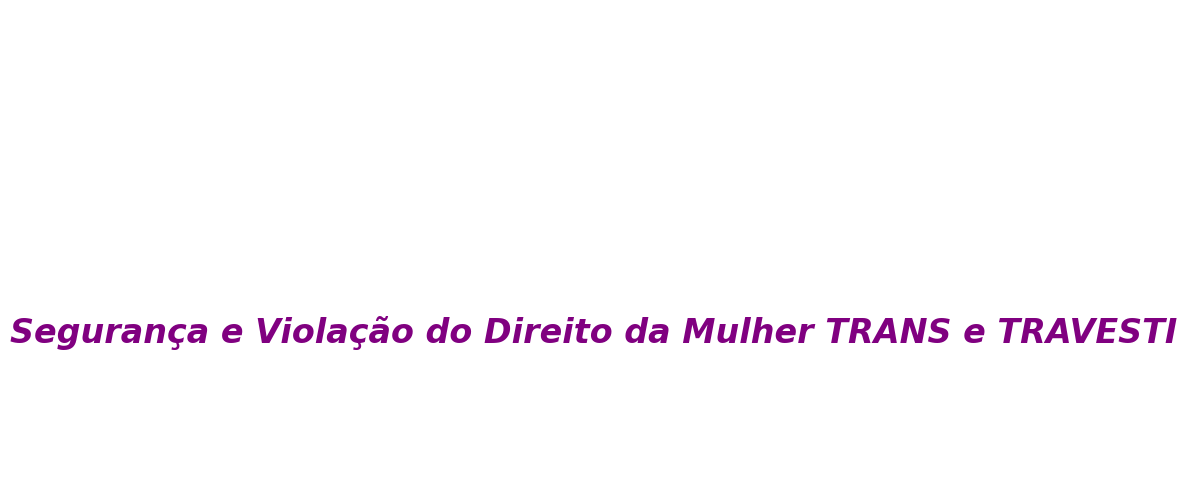

In [ ]:
import matplotlib.pyplot as plt

# Criar uma figura
plt.figure(figsize=(8, 6))

# Adicionar o título estilizado
plt.text(0.3, 0.3, 'Segurança e Violação do Direito da Mulher TRANS e TRAVESTI',
         fontsize=24, fontweight='bold', color='purple',
         ha='center', va='center', fontstyle='italic')

# Remover os eixos
plt.axis('off')

# Exibir
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dados_violencia_mulheres_ses_2023 (2).csv to dados_violencia_mulheres_ses_2023 (2) (1).csv


In [ ]:
print(uploaded)


{'dados_violencia_mulheres_ses_2023 (2) (1).csv': b"\xef\xbb\xbfDT_NOTIFIC;DT_NASC;NU_IDADE_N;CS_SEXO;CS_RACA;ID_MN_RESI;LOCAL_OCOR;OUT_VEZES;LES_AUTOP;VIOL_FISIC;VIOL_PSICO;VIOL_SEXU;NUM_ENVOLV;AUTOR_SEXO;ORIENT_SEX;IDENT_GEN\r\n02/01/2023;21/03/2008;14;Feminino;Branca;Rio Novo;Residencia;Sim;Sim;Sim;N\xc3\xa3o;N\xc3\xa3o;Um;Feminino;Heterossexual;Ignorado\r\n01/01/2023;29/11/1976;46;Feminino;Branca;Carmo do Rio Claro;Residencia;Sim;N\xc3\xa3o;Sim;N\xc3\xa3o;N\xc3\xa3o;Um;Masculino;Heterossexual;Ignorado\r\n02/01/2023;10/05/1997;25;Feminino;Parda;Pirapora;Residencia;Ignorado;Sim;Sim;N\xc3\xa3o;N\xc3\xa3o;Um;Feminino;Heterossexual;N\xc3\xa3o se aplica\r\n02/01/2023;02/10/1982;40;Feminino;Parda;V\xc3\xa1rzea da Palma;Residencia;Ignorado;Sim;Sim;N\xc3\xa3o;N\xc3\xa3o;Um;Feminino;Heterossexual;N\xc3\xa3o se aplica\r\n03/01/2023;10/11/2016;6;Feminino;Parda;Guaraciaba;Residencia;Sim;N\xc3\xa3o;N\xc3\xa3o;N\xc3\xa3o;Sim;Um;Masculino;N\xc3\xa3o se aplica;N\xc3\xa3o se aplica\r\n03/01/2023;24/

     DT_NOTIFIC     DT_NASC  NU_IDADE_N   CS_SEXO CS_RACA          ID_MN_RESI  \
58   09/01/2023  08/06/1982        40.0  Feminino  Branca  Itamarati de Minas   
115  02/01/2023  05/01/1989        33.0  Feminino   Parda           Rio Casca   
193  08/01/2023  02/01/1998        25.0  Feminino   Parda            Mirabela   
249  01/01/2023  29/07/1980        42.0  Feminino   Parda        Bom Despacho   
274  05/01/2023  04/07/1993        29.0  Feminino   Parda    Serra do Salitre   

         LOCAL_OCOR OUT_VEZES LES_AUTOP VIOL_FISIC VIOL_PSICO VIOL_SEXU  \
58       Residencia       Não       Não        Sim        Não       Não   
115  Bar ou similar       Não       Não        Sim        Não       Não   
193      Residencia       Sim       Sim        Sim        Sim       Não   
249      Residencia       Não       Não        Sim        Não       Não   
274      Residencia       Não       Não        Sim        Não       Não   

       NUM_ENVOLV AUTOR_SEXO     ORIENT_SEX           IDENT_GE

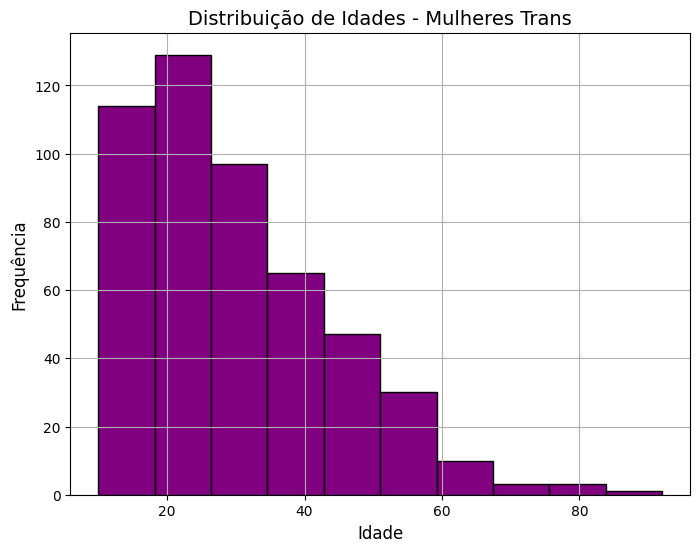

In [ ]:
data = pd.read_csv('dados_violencia_mulheres_ses_2023 (2) (1).csv', delimiter=';')
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados com o delimitador correto
data = pd.read_csv('dados_violencia_mulheres_ses_2023 (2) (1).csv', delimiter=';')

# Filtrar os dados para identificar "Mulheres Trans" na coluna "IDENT_GEN"
mulheres_trans = data[data['IDENT_GEN'].str.contains('Trans', case=False, na=False)]

# Verificar se há dados e exibir as primeiras linhas (opcional)
print(mulheres_trans.head())

# Criar o gráfico de distribuição das idades
plt.figure(figsize=(8, 6))
plt.hist(mulheres_trans['NU_IDADE_N'].dropna(), bins=10, color='purple', edgecolor='black')
plt.title('Distribuição de Idades - Mulheres Trans', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True)

# Exibir o gráfico
plt.show()

